In [1]:
import pandas as pd, numpy as np

In [2]:
train_file = r'C:\Users\Anjana Tiha\Drive D\Programming\Projects\House Prices Advanced Regression Techniques\house-prices-advanced-regression-techniques\train.csv'
test_file = r'C:\Users\Anjana Tiha\Drive D\Programming\Projects\House Prices Advanced Regression Techniques\house-prices-advanced-regression-techniques\test.csv'
train = pd.read_csv(train_file)
test = pd.read_csv(test_file)
# train = pd.read_csv("../input/train.csv")
# test = pd.read_csv("../input/train.csv")


In [3]:
# data = train+test
data = train

In [4]:
from sklearn.preprocessing import Normalizer

target_col = 'SalePrice'

target = data[target_col]

# test_y= test[target_col]
test_y= None

data.drop(columns=target_col, inplace=True)

features = data

rating_cols = ['ExterQual' 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
rating_score = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
rating_cols2 = {'BsmtFinType1', 'BsmtFinType2'}
rating_score2 = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0}

ignore_cols = ['BsmtExposure']
features.drop(columns=ignore_cols, inplace=True)
test_x= test.drop(columns=ignore_cols, inplace=True)


# print(data.isnull().sum(axis=1))   




normalizer = Normalizer(copy=False)
normalizer.fit([target])

target = normalizer.transform([target]).flatten().astype('float64')

features.describe()
# target.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [5]:
from sklearn import preprocessing


# print(data.isnull().sum(axis=1))   

features.replace(-np.Inf, np.nan)
features.replace(np.Inf, np.nan)
features.replace(np.nan, 0)
features = features.fillna(0)

dtype_grp = features.columns.to_series().groupby(data.dtypes).groups

for dtype in dtype_grp:
    print(dtype_grp[dtype])

    
for dtype in dtype_grp:
    if dtype=='int64' :
        for col in dtype_grp[dtype]:
            features[col] = features[col].fillna(0.0)
            features[col]=preprocessing.normalize([features[col]], norm='l2').flatten()
            features[col] = features[col].astype('float64')
    elif dtype=='float64' :
        for col in dtype_grp[dtype]:
            features[col] = features[col].fillna(0.0)
            features[col]=preprocessing.normalize([features[col]], norm='l2').flatten()
            features[col] = features[col].astype('float64')
    elif dtype=='object' :
        for col in dtype_grp[dtype]:
            if col in rating_cols:
                features[col].replace(rating_score, regex=True, inplace=True)
                features[col] = features[col].fillna(0.0)
                features[col] = features[col].astype('float64')
            elif col in rating_cols2:
                features[col].replace(rating_score2, regex=True, inplace=True)
                features[col] = features[col].fillna(0.0)
                features[col] = features[col].astype('float64')
            else:
                try:
                    le = preprocessing.LabelEncoder()
                    enc = preprocessing.OneHotEncoder()
                    le.fit(features[col].astype(str))
                    label_enc_feature_val = le.transform(features[col].astype(str))
                    features[col] = label_enc_feature_val.astype('float64')

#                     enc.fit([label_enc_feature_val])  
#                     hot_enc_feature_val = enc.transform([label_enc_feature_val])

#                     print(hot_enc_feature_val)

#                     features.join(hot_enc_feature_val)
#                     features.drop(columns=col)
                except ValueError:
                    print(col)
                    print("Oops!  That was no valid number.  Try again...")



Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')
Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 

In [6]:
# print(data.isnull().sum(axis=1))
X = features.values
Y = target
# print(features.info())

In [9]:
from sklearn import metrics

# from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score
    
def model_evaluation(X, Y, X_test, y_test, splitter, model, model_type, report, details):
    if model_type=="classification":
        accuracy = 0
        f1 = 0
        precision = 0
        recall = 0

    elif model_type=="regression":
        explained_variance_score_val = 0
        mean_absolute_error_val = 0
        mean_squared_error_val = 0
        mean_squared_log_error_val = 0
        median_absolute_error_val = 0
        r2_score_val = 0
    
    if report:
#         print("Spliter Description:")
#         print(splitter)
#         print("-"*100, "\n")
        print("Model Description:")
        print(model)
        print("-"*100,"\n")
      
    if splitter:
        i=0
        for train_index, test_index in splitter.split(X, Y):
            print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]

            model.fit(X_train, y_train)
            predict = model.predict(X_test)
            

            if model_type=="classification":
                accuracy_temp = metrics.accuracy_score(y_test, predict)
                precision_temp = metrics.precision_score(y_test, predict, average="micro")
                recall_temp = metrics.recall_score(y_test, predict, average="micro")
                f1_temp = metrics.f1_score(y_test, predict, average="micro")
                hamming_loss = metrics.hamming_loss(y_test, predict)

                accuracy = accuracy + accuracy_temp
                precision = precision + precision_temp
                recall = recall+ recall_temp
                f1= f1 + f1_temp

            elif model_type=="regression":
                explained_variance_score_temp = metrics.explained_variance_score(y_test, predict)
                mean_absolute_error_temp = metrics.mean_absolute_error(y_test, predict)
                mean_squared_error_temp = metrics.mean_squared_error(y_test, predict)
                mean_squared_log_error_temp = metrics.mean_squared_log_error(y_test, predict)
                median_absolute_error_temp = metrics.median_absolute_error(y_test, predict)
                r2_score_temp = metrics.r2_score(y_test, predict)


                explained_variance_score_val = explained_variance_score_val + explained_variance_score_temp
                mean_absolute_error_val = mean_absolute_error_val + mean_absolute_error_temp
                mean_squared_error_val = mean_squared_error_val + mean_squared_error_temp
                mean_squared_log_error_val = mean_squared_log_error_val + mean_squared_log_error_temp
                median_absolute_error_val = median_absolute_error_val + median_absolute_error_temp
                r2_score_val = r2_score_val + r2_score_temp
            
            if details:
                print("*"*25,  " ITERATION - ", i+1, "*"*25)
#                 print("TRAIN:", train_index, "TEST:", test_index)
                if model_type=="classification":
                    print("-"*35)
                    print('%50s%s' % ("accuracy_score :", accuracy_temp))
                    print('%50s%s' % ("precision_score :", precision_score))
                    print('%50s%s' % ("recall_score :", recall_score))
                    print('%50s%s' % ("f1_score :", f1_score))
                    print('%50s%s' % ("hamming_loss :", hamming_loss))
                    precision, recall, thresholds = metrics.precision_recall_curve(y_test, predict)
                    print('%50s%s' % ("average_precision_score :", metrics.average_precision_score(y_test, predict, average="micro")))
                    print('%50s%s' % ("fbeta_score :", metrics.fbeta_score(y_test, predict)))
                    print('%50s%s' % ("roc_auc_score :", metrics.roc_auc_score(y_test, predict, average="micro")))
                    print("-"*35)
                    print(metrics.classification_report(y_test, predict))
                    print("-"*35)
                    print("confusion Matrix:\n\n", metrics.confusion_matrix(y_test, predict))
                    print("-"*35)
                    print("\n")

                elif model_type=="regression":
                    print("-"*35)
                    print('%50s%s' % ("explained_variance_score_temp :", explained_variance_score_temp))
                    print('%50s%s' % ("mean_absolute_error_temp :", mean_absolute_error_temp))
                    print('%50s%s' % ("mean_squared_error_temp :", mean_squared_error_temp))
                    print('%50s%s' % ("median_absolute_error_temp :", median_absolute_error_temp))
                    print('%50s%s' % ("mean_squared_log_error_temp :", mean_squared_log_error_temp))
                    print('%50s%s' % ("median_absolute_error_temp :", median_absolute_error_temp))
                    print('%50s%s' % ("r2_score_val :", r2_score_val))
                    print("-"*35)
                    print("\n")
            i+=1

        split_num = splitter.get_n_splits()
        
        if model_type=="classification":
            accuracy = accuracy/split_num
            precision = precision/split_num
            recall = recall/split_num
            f1 = f1/split_num
            
        elif model_type=="regression":
            explained_variance_score_val = explained_variance_score_val/split_num
            mean_absolute_error_val = mean_absolute_error_val/split_num
            mean_squared_error_val = mean_squared_error_val/split_num
            median_absolute_error_val = median_absolute_error_val/split_num
            r2_score_val = r2_score_val/split_num

    else:
        model.fit(X, Y)
        predict = model.predict(X_test)
        
        if model_type=="classification":
            accuracy = metrics.accuracy_score(y_test, predict)
            precision = metrics.precision_score(y_test, predict, average="micro")
            recall = metrics.recall_score(y_test, predict, average="micro")
            f1 = metrics.f1_score(y_test, predict, average="micro")
            hamming_loss = metrics.hamming_loss(y_test, predict)
            
        elif model_type=="regression":
            explained_variance_score = explained_variance_score(y_test, predict)
            mean_absolute_error = mean_absolute_error(y_test, predict)
            mean_squared_error = mean_squared_error(y_test, predict)
            mean_squared_log_error = mean_squared_log_error(y_test, predict)
            median_absolute_error = median_absolute_error(y_test, predict)
            r2_score_temp = r2_score(y_test, predict)
            
    if report:
        if splitter:
            print("*"*50, " Average For", i+1, " Folds", "*"*50)
        if model_type=="classification":
            print('%50s%s' % ("Average Accuracy Score: ", accuracy))
            print('%50s%s' % ("Average pPrecision Score: ", precision))
            print('%50s%s' % ("Average Recall Score: ", recall))
            print('%50s%s' % ("Average F1 Score: ", f1))
        
        elif model_type=="regression":
            print('%50s%s' % ("Average explained_variance_score: ", explained_variance_score_val))
            print('%50s%s' % ("Average mean_absolute_error: ", mean_absolute_error_val))
            print('%50s%s' % ("Average mean_squared_error: ", mean_squared_error_val))
            print('%50s%s' % ("Average mean_squared_log_error: ", mean_squared_log_error_val))
            print('%50s%s' % ("Average median_absolute_error: ", median_absolute_error_val))
            print('%50s%s' % ("Average r2_score: ", r2_score_val))
            print("\n")
            print("*"*100)
            
    
    if model_type=="classification":
        return accuracy, precision, recall, f1
    elif model_type=="regression":
        return explained_variance_score_val, mean_absolute_error_val, mean_squared_error_val, mean_squared_log_error_val, median_absolute_error_val, r2_score_val


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

# classifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import (AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomTreesEmbedding, RandomForestClassifier, VotingClassifier)
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LogisticRegression
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB 
from sklearn.neighbors import KDTree, KNeighborsClassifier, NearestNeighbors
from sklearn.neural_network import BernoulliRBM, MLPClassifier
from sklearn.svm import LinearSVC, NuSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# regressor
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import (AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomTreesEmbedding, RandomForestRegressor, VotingClassifier)
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.isotonic import IsotonicRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ARDRegression, LinearRegression, LogisticRegression, LogisticRegressionCV, logistic_regression_path, HuberRegressor, PassiveAggressiveRegressor, RandomizedLogisticRegression, RANSACRegressor, SGDRegressor, TheilSenRegressor
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB 
from sklearn.neighbors import KDTree, KNeighborsRegressor, NearestNeighbors, RadiusNeighborsRegressor
from sklearn.neural_network import BernoulliRBM, MLPRegressor
from sklearn.svm import LinearSVR, NuSVR, SVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor


import gc

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
kf = KFold(n_splits = 5, random_state=None, shuffle =True)

classifiers = {
    "AdaBoostClassifier": AdaBoostClassifier(),
    "BernoulliNB": BernoulliNB(),
#     "BernoulliRBM": BernoulliRBM(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
#     "GaussianMixture": GaussianMixture(),
#     "GaussianNB": GaussianNB(),
#     "GaussianProcessClassifier": GaussianProcessClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
#     "KDTree": KDTree(),
#     "KNeighborsClassifier": KNeighborsClassifier(3),
    "LogisticRegression": LogisticRegression(),
    "LinearSVC": LinearSVC(),
    "MLPClassifier": MLPClassifier(),
    "MultinomialNB": MultinomialNB(),
#     "NearestNeighbors": NearestNeighbors(),
#     "NuSVC": NuSVC(),
    "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis(),
    "RandomForestClassifier": RandomForestClassifier(),
    "SVC Linear": SVC(kernel="linear", C=0.025),
    "SVC": SVC(),
    "SVC Gamma": SVC(gamma=2, C=1)
#     VotingClassifier: VotingClassifier(),
}

classifiers2 = {
#     "AdaBoostClassifier": AdaBoostClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "GaussianNB": GaussianNB(),
#     "GradientBoostingClassifier": GradientBoostingClassifier(),
#     "KNeighborsClassifier": KNeighborsClassifier(3),
    "LogisticRegression": LogisticRegression(),
    "LinearSVC": LinearSVC(),
    "MultinomialNB": MultinomialNB(),
#     "NuSVC": NuSVC(),
    "RandomForestClassifier": RandomForestClassifier(),
    "SVC Linear": SVC(kernel="linear", C=0.025)
#     "SVC": SVC(),
#     "SVC Gamma": SVC(gamma=2, C=1)
}

classifiers3 = {
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "GaussianNB": GaussianNB(),
    "LogisticRegression": LogisticRegression(),
    "LinearSVC": LinearSVC(),
    "MultinomialNB": MultinomialNB(),
    "RandomForestClassifier": RandomForestClassifier(),
    "SVC Linear": SVC(kernel="linear", C=0.025)
}


regressors = {
    "AdaBoostRegressor": AdaBoostRegressor(),
#     "ARDRegression": ARDRegression(),
    "BaggingRegressor": BaggingRegressor(),
#     "BernoulliRBM": BernoulliRBM(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "ExtraTreesRegressor": ExtraTreesRegressor(),
    "ExtraTreeRegressor": ExtraTreeRegressor(),
#     "GaussianMixture": GaussianMixture(),
#     "GaussianNB": GaussianNB(),
    "GaussianProcessRegressor": GaussianProcessRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "HuberRegressor": HuberRegressor(),
#     "IsotonicRegression": IsotonicRegression(),
    "KernelRidge": KernelRidge(),
#     "KDTree": KDTree(),
#     "KNeighborsRegressor": KNeighborsRegressor(),
#     "LinearRegression": LinearRegression(), 
#     "LogisticRegression": LogisticRegression(),
#     "LogisticRegressionCV": LogisticRegressionCV(),
#     "logistic_regression_path": logistic_regression_path(),
    "LinearSVR": LinearSVR(),
    "MLPRegressor": MLPRegressor(),
#     "MultinomialNB": MultinomialNB(),
    "NuSVR": NuSVR(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
#     "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis(),
#     "RadiusNeighborsRegressor": RadiusNeighborsRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
#     "RandomizedLogisticRegression": RandomizedLogisticRegression(),
#     "RANSACRegressor": RANSACRegressor(),
#     "SGDRegressor": SGDRegressor(),
    "SVR": SVR(),
    "TheilSenRegressor": TheilSenRegressor(),
}



# splitter = sss
splitter = kf
# splitter = None
model_type = "regression"
report = 1
details = 1
evaluation = {}
X_test = None
y_test = None

print("*"*50, " START ", "*"*50)
print("Spliter Description:")
print(splitter)        

if model_type=="classification":
    splitter = sss    
    for name in classifiers:
        evaluation_temp = []
        accuracy, precision, recall, f1 = model_evaluation(X, Y, X_test, y_test, splitter, regressors[name], model_type, report, details=None)
        evaluation_temp.append(accuracy)
        evaluation_temp.append(precision)
        evaluation_temp.append(recall)
        evaluation_temp.append(f1)
        evaluation[name] = evaluation_temp
        gc.collect()
        
    rows_list = []
    
    for name in evaluation:
        rows_list.append([name]+evaluation[name])
    
    evaluation_pd = pd.DataFrame(rows_list, columns=['model', 'accuracy', 'precision', 'recall', 'f1']) 

            
elif model_type=="regression":
    splitter = kf 
    for name in regressors:
        evaluation_temp = []    
        explained_variance_score_val, mean_absolute_error_val, mean_squared_error_val, mean_squared_log_error_val, median_absolute_error_val, r2_score_val = model_evaluation(X, Y, X_test, y_test, splitter, regressors[name], model_type, report, details=None)
        evaluation_temp.append(explained_variance_score_val)
        evaluation_temp.append(mean_absolute_error_val)
        evaluation_temp.append(mean_squared_error_val)
        evaluation_temp.append(mean_squared_log_error_val)
        evaluation_temp.append(median_absolute_error_val)
        evaluation_temp.append(r2_score_val)
        evaluation[name] = evaluation_temp

    rows_list = []

    for name in evaluation:
        rows_list.append([name]+evaluation[name])

    evaluation_pd = pd.DataFrame(rows_list, columns=['Model Name', 'explained_variance_score',  'mean_absolute_error', 'mean_squared_error', 'mean_squared_log_error', 'median_absolute_error', 'r2_score']) 
    
    print("*"*50, " END ", "*"*50)

**************************************************  START  **************************************************
Spliter Description:
KFold(n_splits=5, random_state=None, shuffle=True)
Model Description:
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)
---------------------------------------------------------------------------------------------------- 

TRAIN: [   0    1    2 ... 1456 1458 1459] TEST: [   9   11   23   25   27   30   38   45   48   56   58   63   66   71
   77   78   80   91   94  104  115  117  121  123  124  126  128  139
  141  156  157  158  162  167  172  174  186  189  208  212  219  221
  227  230  240  244  250  257  266  271  274  281  285  288  291  295
  299  300  301  307  309  311  312  323  330  332  341  342  349  355
  361  365  367  392  394  395  396  397  402  404  409  418  419  422
  424  429  437  441  445  461  464  468  469  475  477  478  480  483
  485  491  508  513  521  527  

TRAIN: [   0    1    4 ... 1457 1458 1459] TEST: [   2    3    8    9   11   17   19   32   41   42   43   45   47   68
   69   78   79   89   90   93   99  104  105  106  107  111  112  113
  119  121  130  133  137  140  144  146  147  149  150  165  166  172
  175  177  183  185  194  208  209  213  215  218  229  233  240  249
  257  261  267  281  284  292  296  297  303  306  308  311  315  317
  320  324  327  330  337  342  354  355  356  363  367  371  377  378
  382  388  392  402  407  413  415  419  423  424  433  438  441  445
  459  460  461  471  473  474  479  484  495  496  497  505  506  520
  524  532  550  552  556  562  564  569  571  575  577  579  596  598
  609  611  620  621  629  632  634  638  640  643  652  657  664  666
  672  681  682  683  709  711  712  714  715  721  722  726  729  748
  751  752  761  762  764  766  767  773  777  779  780  782  790  795
  799  801  803  813  824  828  845  849  852  858  863  864  868  870
  874  884  892  900  905  9

TRAIN: [   0    1    2 ... 1457 1458 1459] TEST: [   4   11   18   20   22   24   29   47   58   60   61   62   70   75
   76   86   88  103  104  108  115  116  123  127  131  137  142  143
  144  146  147  149  156  158  160  166  169  186  189  196  201  203
  222  230  232  237  239  241  243  244  247  251  259  272  273  277
  278  279  281  286  290  339  358  367  370  371  374  390  391  393
  405  406  407  419  423  437  438  442  443  457  462  464  465  483
  491  492  493  496  503  507  515  516  523  524  531  541  542  545
  550  554  555  556  557  561  563  566  567  580  582  588  594  596
  602  614  616  617  653  659  665  666  669  672  679  689  698  705
  713  716  722  724  732  739  740  751  760  763  767  768  769  771
  788  795  797  802  810  817  823  832  833  835  849  855  856  857
  861  864  865  867  877  881  883  892  901  903  915  919  920  925
  929  931  933  935  948  949  960  968  978  979  980  986  990  994
  995 1001 1002 1004 1006 10

TRAIN: [   1    2    5 ... 1456 1457 1459] TEST: [   0    3    4   10   11   15   23   25   26   28   36   40   41   46
   48   50   53   54   56   63   73   76   79   80   87   88   90   91
   93   97  113  115  117  121  126  140  142  146  153  155  156  164
  165  168  174  175  185  189  190  192  196  199  218  239  242  243
  244  256  260  263  268  270  272  273  284  285  290  292  296  303
  312  322  325  327  329  333  337  347  353  354  365  366  372  373
  374  383  392  393  400  413  415  417  421  424  427  435  438  441
  446  454  458  461  467  468  472  476  478  487  489  496  498  516
  534  545  550  556  563  565  566  568  569  570  577  587  589  600
  604  610  615  625  629  633  638  647  649  655  658  671  679  680
  681  686  691  692  693  700  704  709  722  730  738  742  743  748
  752  759  760  764  775  784  791  798  801  822  828  830  834  835
  840  841  844  847  850  853  863  865  867  868  872  875  879  889
  892  897  903  916  918  9

TRAIN: [   0    1    3 ... 1457 1458 1459] TEST: [   2    9   11   24   25   40   41   42   55   71   82   83  101  105
  106  107  109  120  126  127  134  138  139  142  143  144  146  153
  157  158  159  169  170  182  183  187  192  213  214  215  224  227
  233  235  236  240  241  248  251  257  259  261  263  264  266  267
  269  271  272  274  279  285  288  292  299  305  306  309  312  316
  318  320  324  326  332  334  338  339  341  349  352  355  357  358
  360  362  376  379  386  390  392  393  395  403  409  410  416  419
  428  440  443  449  452  455  466  471  472  474  480  482  486  489
  492  507  510  519  525  529  530  531  537  539  553  560  561  573
  575  578  585  589  591  597  601  607  611  616  624  628  638  641
  646  647  649  657  669  682  691  700  701  705  706  718  720  721
  723  732  735  737  743  751  767  768  772  775  776  777  778  810
  818  821  825  826  830  833  851  863  867  874  875  878  880  891
  896  897  904  907  908  9

TRAIN: [   0    1    2 ... 1455 1456 1459] TEST: [   7    9   22   23   53   58   69   70   77   79   89  109  110  113
  120  137  146  153  154  155  157  158  168  171  175  178  183  191
  193  194  195  201  202  203  205  207  218  219  222  225  238  252
  254  256  261  263  271  283  288  289  291  299  300  301  305  314
  318  324  326  328  329  332  335  345  348  351  355  357  359  360
  372  373  378  379  391  393  397  401  408  416  419  422  424  433
  434  437  440  443  444  446  457  469  479  491  495  497  500  501
  503  506  521  522  525  528  531  532  541  555  559  571  575  577
  584  600  605  610  612  613  614  618  625  628  633  639  640  642
  644  651  656  657  659  668  671  675  676  678  688  697  709  712
  718  725  727  735  739  752  757  759  763  770  779  794  796  803
  804  808  815  816  817  819  822  824  826  830  833  841  844  845
  850  852  853  857  860  869  870  881  885  888  889  891  892  895
  896  899  903  919  922  9

TRAIN: [   0    1    2 ... 1456 1458 1459] TEST: [   4   22   24   31   32   52   55   60   61   69   72   81   91   92
   93   99  115  116  122  129  130  131  145  152  153  156  174  175
  178  181  184  188  212  217  219  228  229  241  244  245  259  260
  272  273  274  279  283  284  286  295  296  298  301  309  313  332
  338  342  347  355  361  362  364  371  381  384  392  393  397  399
  401  403  404  410  414  438  446  451  456  461  465  467  473  478
  482  484  485  493  503  505  506  507  512  526  533  535  538  545
  555  557  565  572  580  581  585  586  592  598  600  601  603  605
  607  621  623  627  638  649  651  653  658  660  662  666  667  668
  670  672  681  685  691  702  703  708  714  717  721  722  733  734
  740  752  754  765  771  775  779  782  783  784  786  788  791  797
  798  799  801  806  811  813  815  817  818  824  827  838  840  848
  857  874  875  878  881  885  889  892  895  896  898  910  915  921
  927  928  932  945  947  9

TRAIN: [   0    3    4 ... 1456 1458 1459] TEST: [   1    2   12   15   23   28   32   33   35   38   40   43   48   49
   55   62   63   76   77   80   87   93   95   97  105  108  123  129
  130  158  159  164  165  166  167  169  170  182  183  184  186  197
  205  214  220  221  222  226  228  229  230  233  246  249  257  258
  259  274  279  282  284  285  286  297  298  304  308  309  317  329
  330  335  339  341  342  348  352  356  364  367  372  373  376  381
  386  391  393  394  396  400  406  413  414  419  429  437  444  450
  451  453  461  468  472  478  482  485  495  502  509  510  513  517
  532  545  550  565  567  573  588  593  595  601  602  603  607  608
  613  620  621  622  625  630  632  635  636  645  647  648  656  662
  666  668  675  685  692  693  694  698  706  721  722  724  733  751
  758  764  771  774  781  791  795  797  799  801  805  809  812  818
  820  827  836  843  847  850  854  861  862  871  872  874  875  884
  885  890  908  913  924  9

TRAIN: [   0    1    2 ... 1457 1458 1459] TEST: [   9   10   13   14   20   21   27   44   45   46   47   52   56   57
   59   61   67   69   70   74   82   83   87   88   99  102  103  110
  111  112  116  125  137  142  145  146  147  153  156  167  168  169
  172  173  175  178  181  186  194  198  209  221  222  227  229  239
  244  260  262  270  272  274  278  281  287  293  325  336  337  338
  347  348  358  363  374  375  382  387  388  390  394  402  410  414
  416  424  427  431  439  443  445  446  447  450  454  468  479  491
  517  519  523  533  536  542  546  554  562  566  574  578  579  580
  582  590  591  601  608  613  619  621  625  630  631  634  637  638
  639  646  647  650  653  665  668  669  679  680  688  689  699  706
  708  709  716  735  740  754  758  759  768  771  778  780  787  788
  795  810  813  822  825  841  843  844  845  849  850  854  861  863
  864  865  866  868  872  887  888  889  894  902  903  910  911  912
  914  919  925  926  929  9

TRAIN: [   0    1    2 ... 1457 1458 1459] TEST: [   5    8   16   22   26   28   30   40   43   46   51   55   58   63
   65   66   75   76   77   80   87   90   94   96   97   98   99  111
  116  117  119  128  130  131  132  137  149  150  152  159  166  170
  179  184  189  191  197  198  201  202  209  211  215  219  231  235
  237  239  241  248  249  250  254  257  261  276  280  282  283  284
  293  296  302  303  311  312  313  317  321  322  330  332  334  335
  345  350  366  372  374  380  394  409  410  413  419  425  430  434
  436  440  443  448  456  459  462  465  467  472  473  474  475  486
  496  498  510  526  528  529  546  549  551  557  558  564  566  567
  568  569  580  583  592  597  599  605  625  626  629  631  637  639
  642  647  650  669  674  676  677  679  690  700  703  707  715  723
  739  740  746  748  751  758  760  766  768  780  790  792  797  799
  808  810  811  824  829  832  839  846  847  849  854  865  871  879
  880  883  886  888  889  8

TRAIN: [   1    2    4 ... 1457 1458 1459] TEST: [   0    3    6   10   11   29   30   37   39   40   41   42   46   50
   58   66   68   71   77   80   81   83   85  100  105  106  108  110
  112  116  120  124  128  129  135  139  140  143  153  161  164  177
  182  186  202  207  209  213  214  220  225  227  231  232  233  238
  245  247  255  258  262  264  281  285  292  298  301  302  307  308
  316  319  340  342  343  345  349  350  352  358  360  361  366  367
  378  383  401  403  405  412  415  425  427  430  433  434  435  436
  440  443  445  446  452  455  464  468  471  477  479  486  508  513
  520  523  526  533  541  545  550  552  554  555  557  564  565  571
  572  574  578  586  589  599  600  602  610  612  613  615  618  625
  626  629  634  646  652  656  659  664  665  672  674  675  681  682
  687  692  697  698  702  716  717  719  724  728  729  731  739  744
  750  751  752  756  768  771  785  791  793  802  804  806  815  817
  825  827  830  842  843  8

C:\Users\Anjana Tiha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


TRAIN: [   0    1    2 ... 1457 1458 1459] TEST: [   3    7   14   16   24   26   39   50   58   61   62   64   67   70
   73   78   79   82   84   97  104  105  106  111  117  126  129  133
  142  150  154  157  166  175  181  186  191  196  200  204  214  217
  219  233  234  235  237  244  245  248  253  261  271  281  282  285
  297  302  322  323  331  344  348  352  353  365  367  373  379  381
  383  384  386  387  390  393  405  409  411  414  417  421  432  436
  437  438  439  441  442  448  456  459  465  468  471  474  485  498
  502  512  518  519  526  528  533  542  544  546  547  552  554  557
  558  561  565  569  571  574  578  579  581  584  606  619  622  630
  631  633  635  636  637  642  646  647  650  652  654  659  660  665
  669  670  671  681  687  694  697  698  701  707  717  729  742  768
  775  776  778  780  787  794  797  798  800  801  805  807  810  813
  815  823  824  827  830  831  833  837  839  852  866  869  878  881
  882  886  887  890  891  9

TRAIN: [   0    1    3 ... 1456 1457 1459] TEST: [   2   21   24   25   28   35   36   39   41   47   59   68   71   75
   77   81   88   90   97   98  109  113  114  121  132  139  142  148
  149  150  156  158  187  189  192  197  198  199  207  209  212  213
  214  219  220  221  222  236  252  263  269  270  271  274  279  280
  282  283  288  289  290  291  294  306  308  311  312  313  318  319
  327  335  338  351  358  379  385  396  397  403  407  409  417  431
  432  433  435  445  450  451  452  456  457  460  461  469  471  472
  474  485  492  495  497  502  506  508  511  519  529  536  539  541
  542  544  571  577  580  586  590  599  600  601  602  603  611  612
  616  617  629  638  647  650  652  662  674  675  684  690  693  694
  697  699  711  720  723  725  726  727  733  738  742  745  760  762
  767  769  772  775  776  780  783  788  796  797  799  806  810  811
  819  822  824  826  827  828  833  834  839  842  847  850  855  856
  860  862  865  872  874  8

In [11]:
evaluation_pd
evaluation = evaluation_pd
# evaluation.drop(columns='Model Name', inplace=True)
evaluation_pd

,Model Name,explained_variance_score,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score
0,AdaBoostRegressor,8.247311e-01,0.003180,0.000020,0.000096,0.002350,0.813651
1,BaggingRegressor,8.342158e-01,0.002573,0.000018,0.000084,0.001647,0.833670
2,DecisionTreeRegressor,7.096871e-01,0.003621,0.000032,0.000148,0.002337,0.708284
3,ExtraTreesRegressor,8.342065e-01,0.002539,0.000018,0.000084,0.001655,0.833036
4,ExtraTreeRegressor,6.806489e-01,0.003709,0.000036,0.000165,0.002358,0.679701
5,GaussianProcessRegressor,-8.876419e-02,0.021470,0.000577,0.002787,0.019559,-4.225832
6,GradientBoostingRegressor,8.778134e-01,0.002212,0.000013,0.000062,0.001397,0.876568
7,HuberRegressor,6.839519e-01,0.003865,0.000035,0.000164,0.002677,0.680769
8,KernelRidge,7.213603e-01,0.003596,0.000031,0.000145,0.002510,0.720401
9,LinearSVR,7.015936e-01,0.004919,0.000045,0.000210,0.004205,0.597142


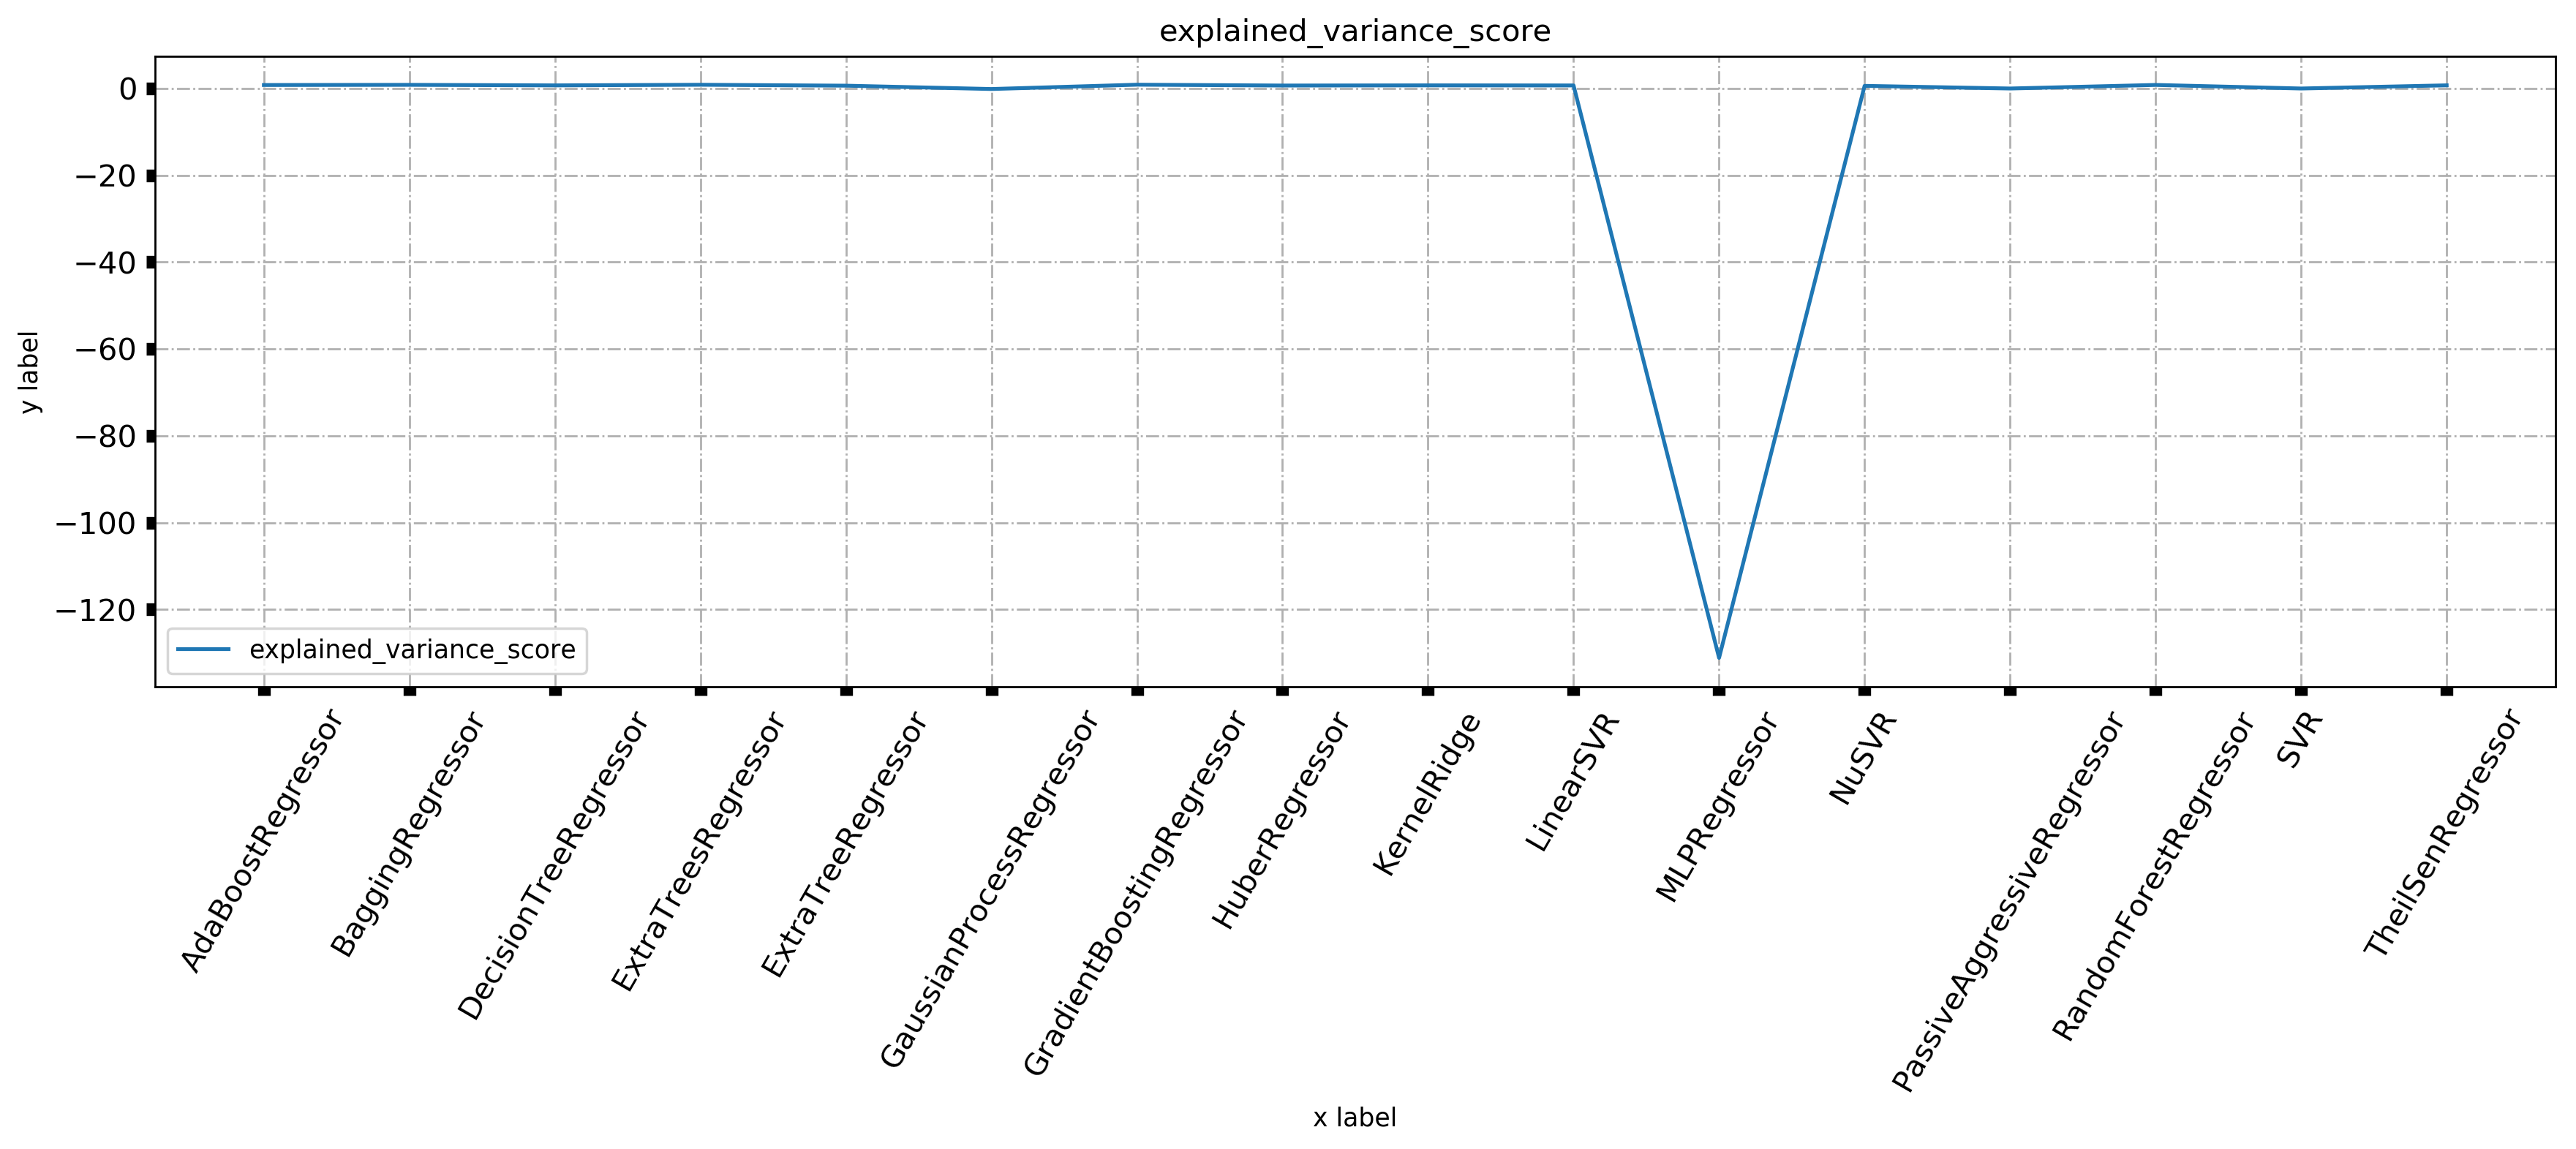

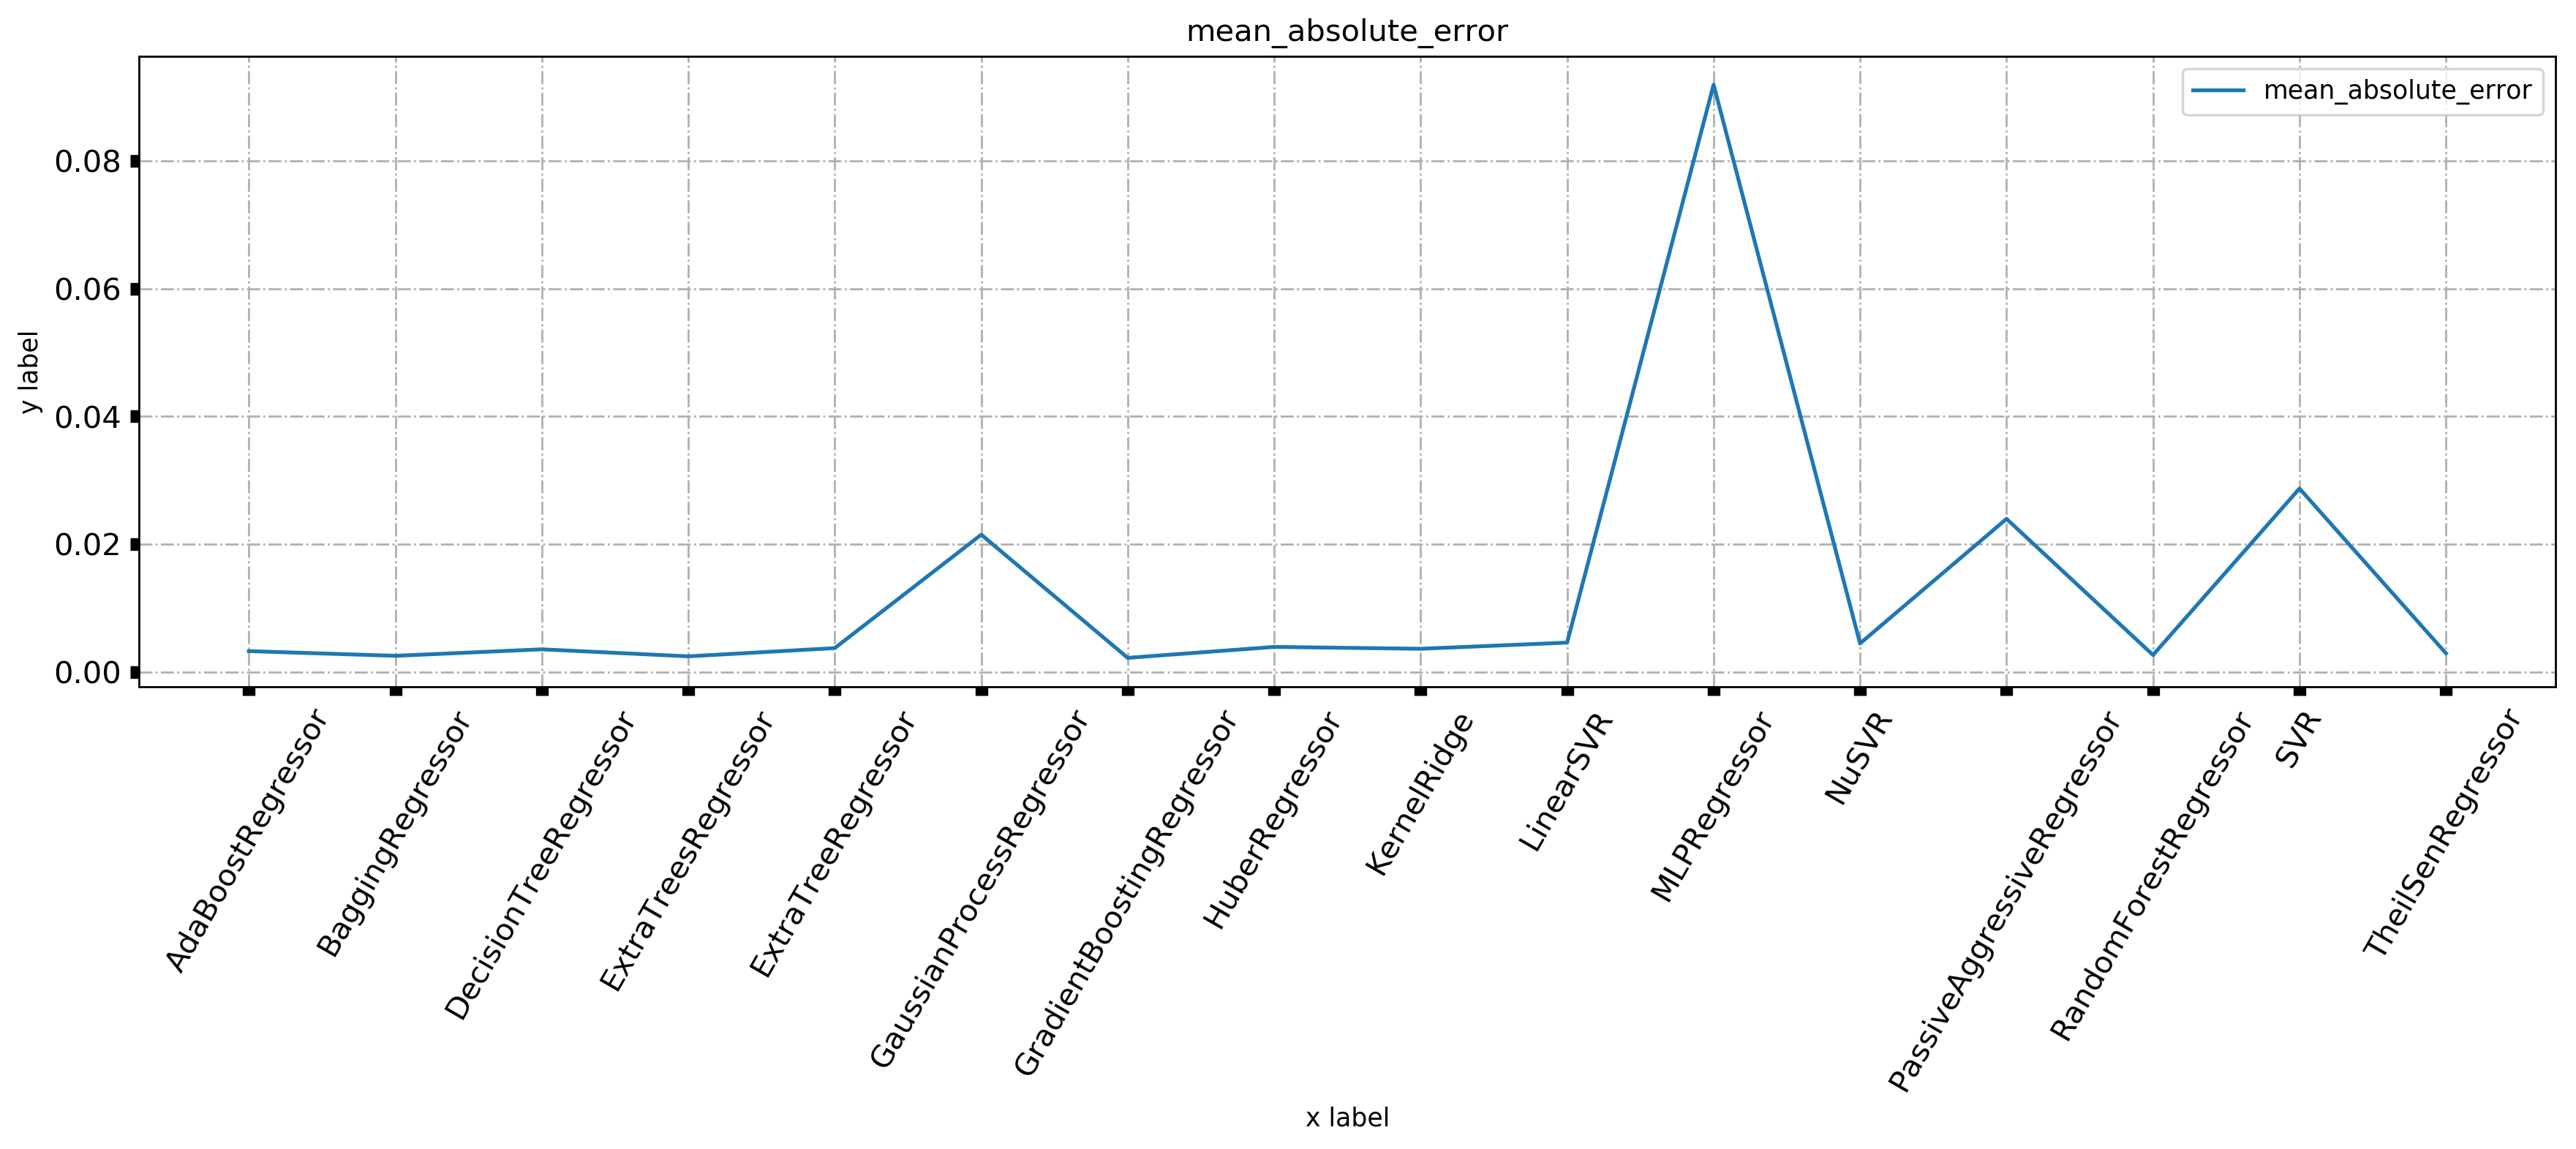

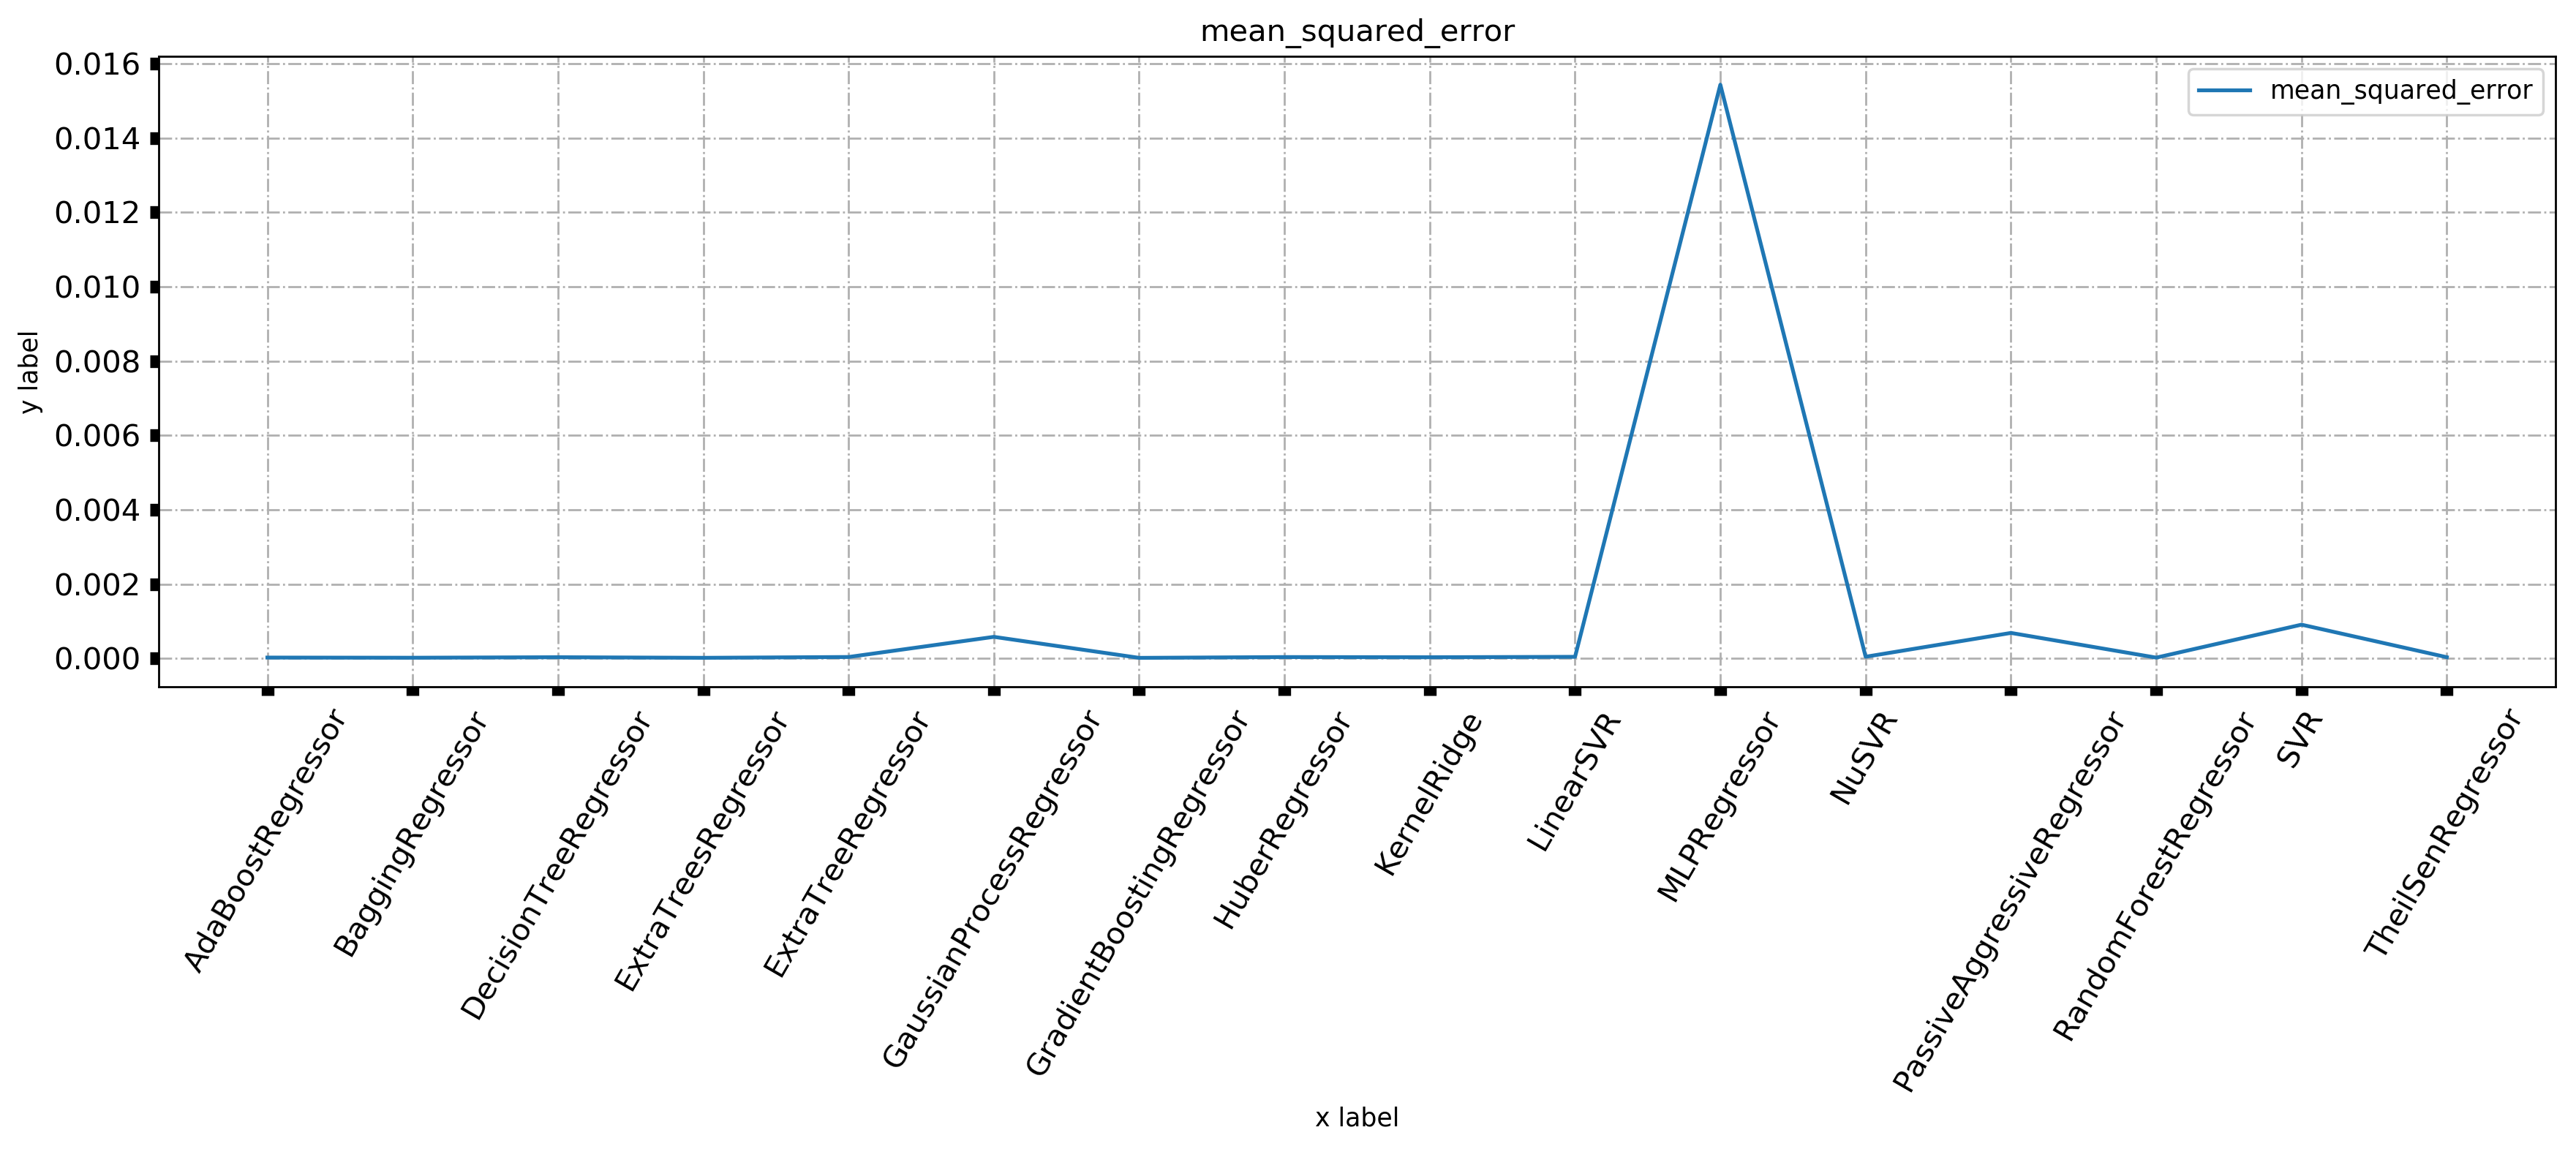

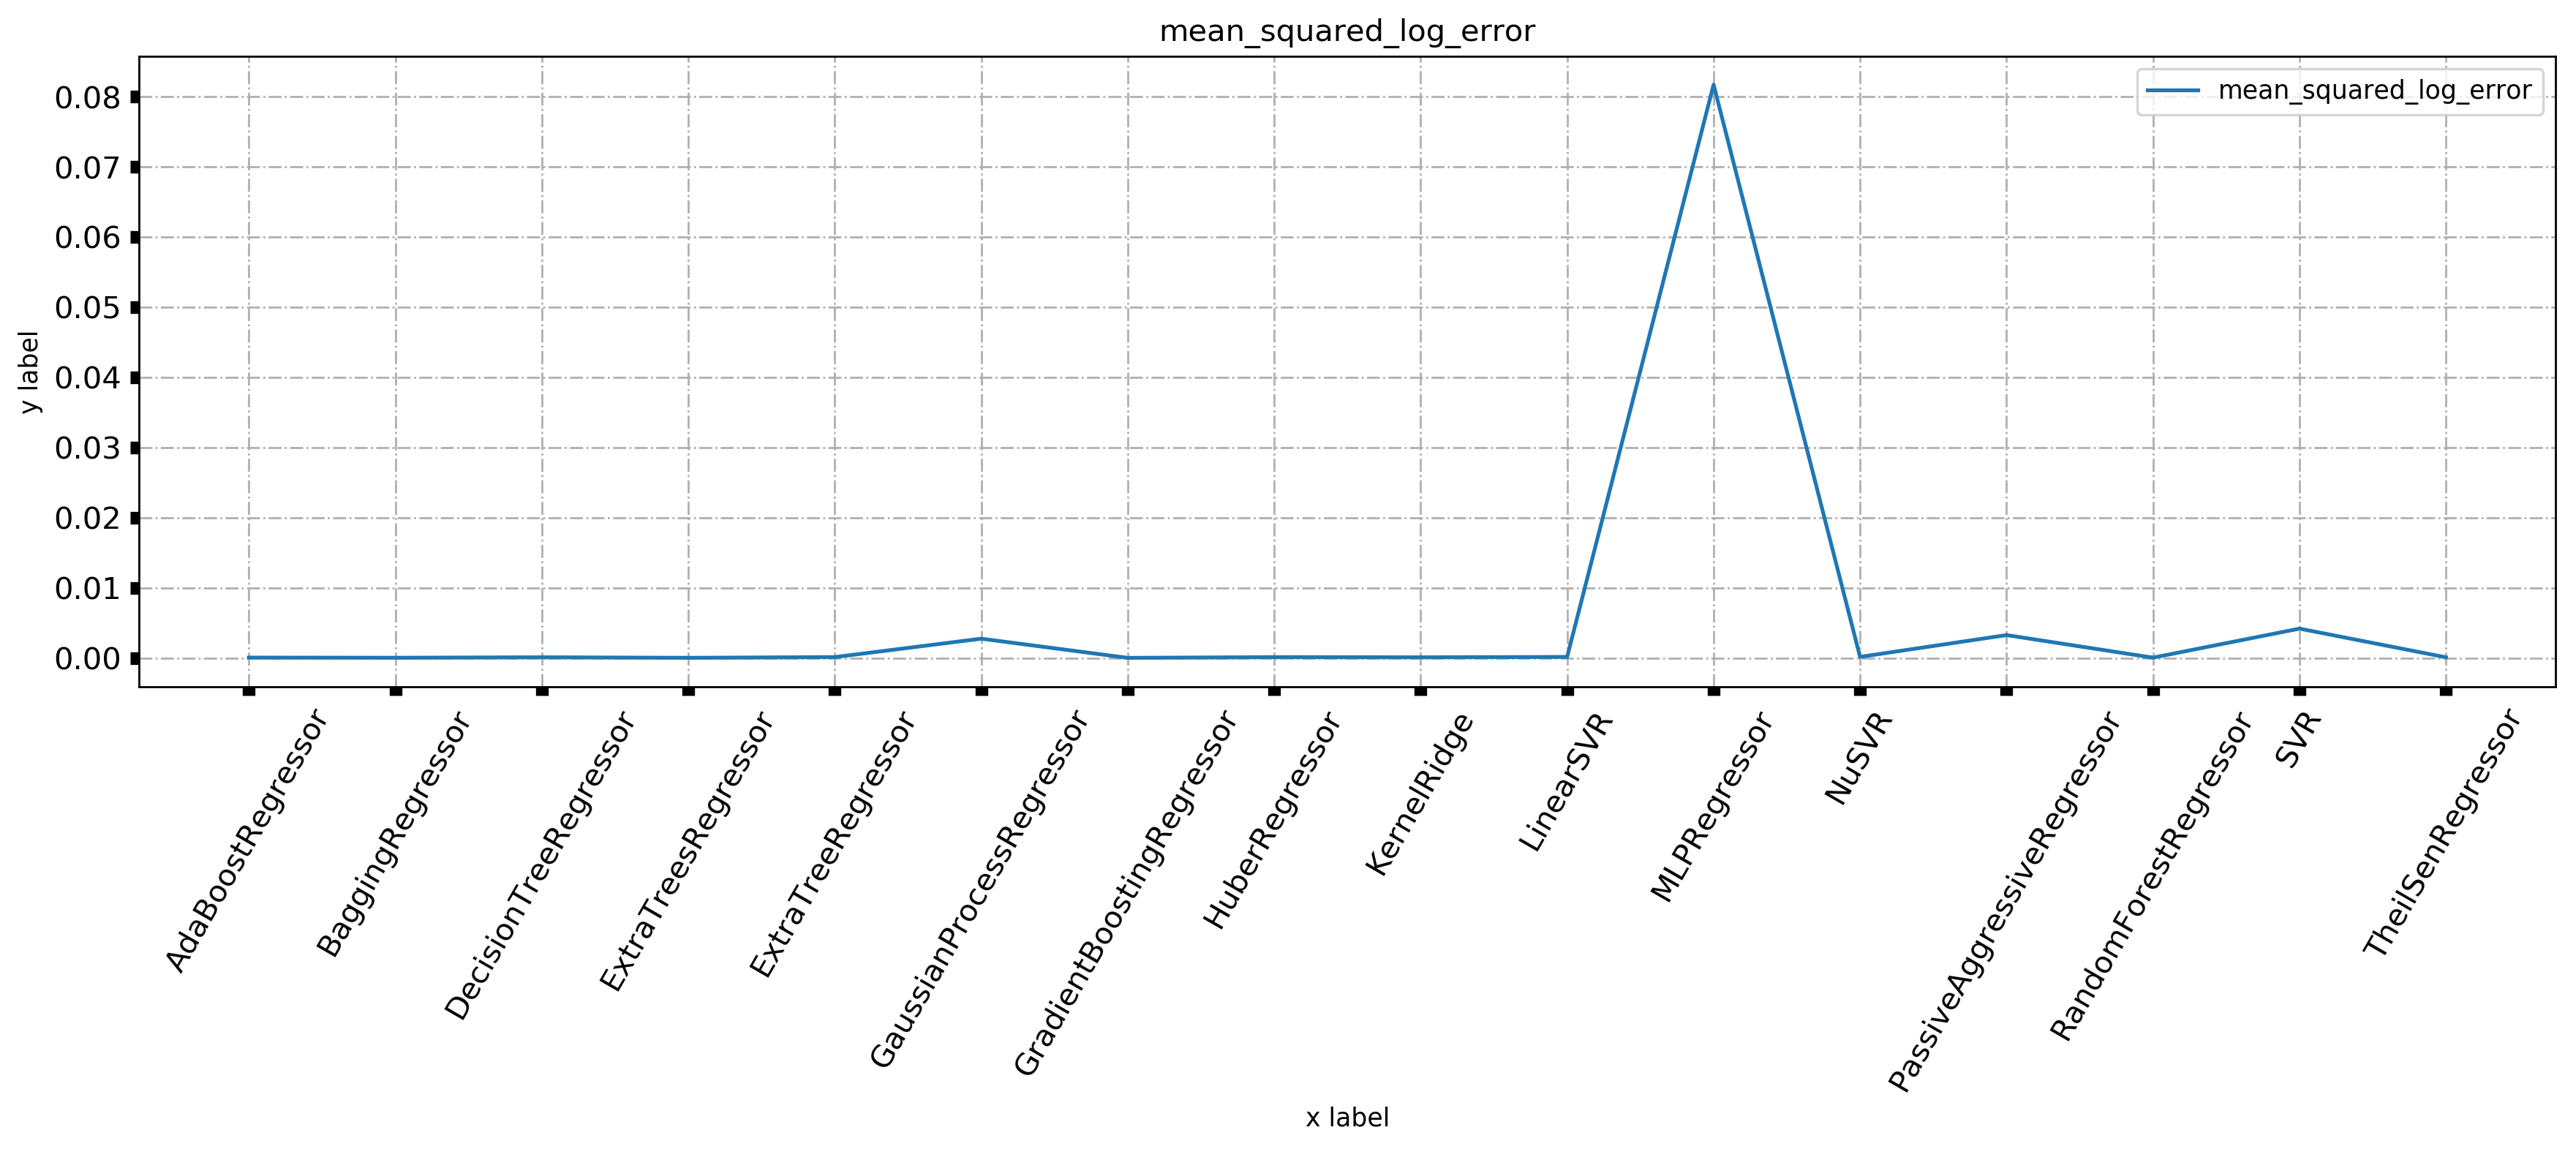

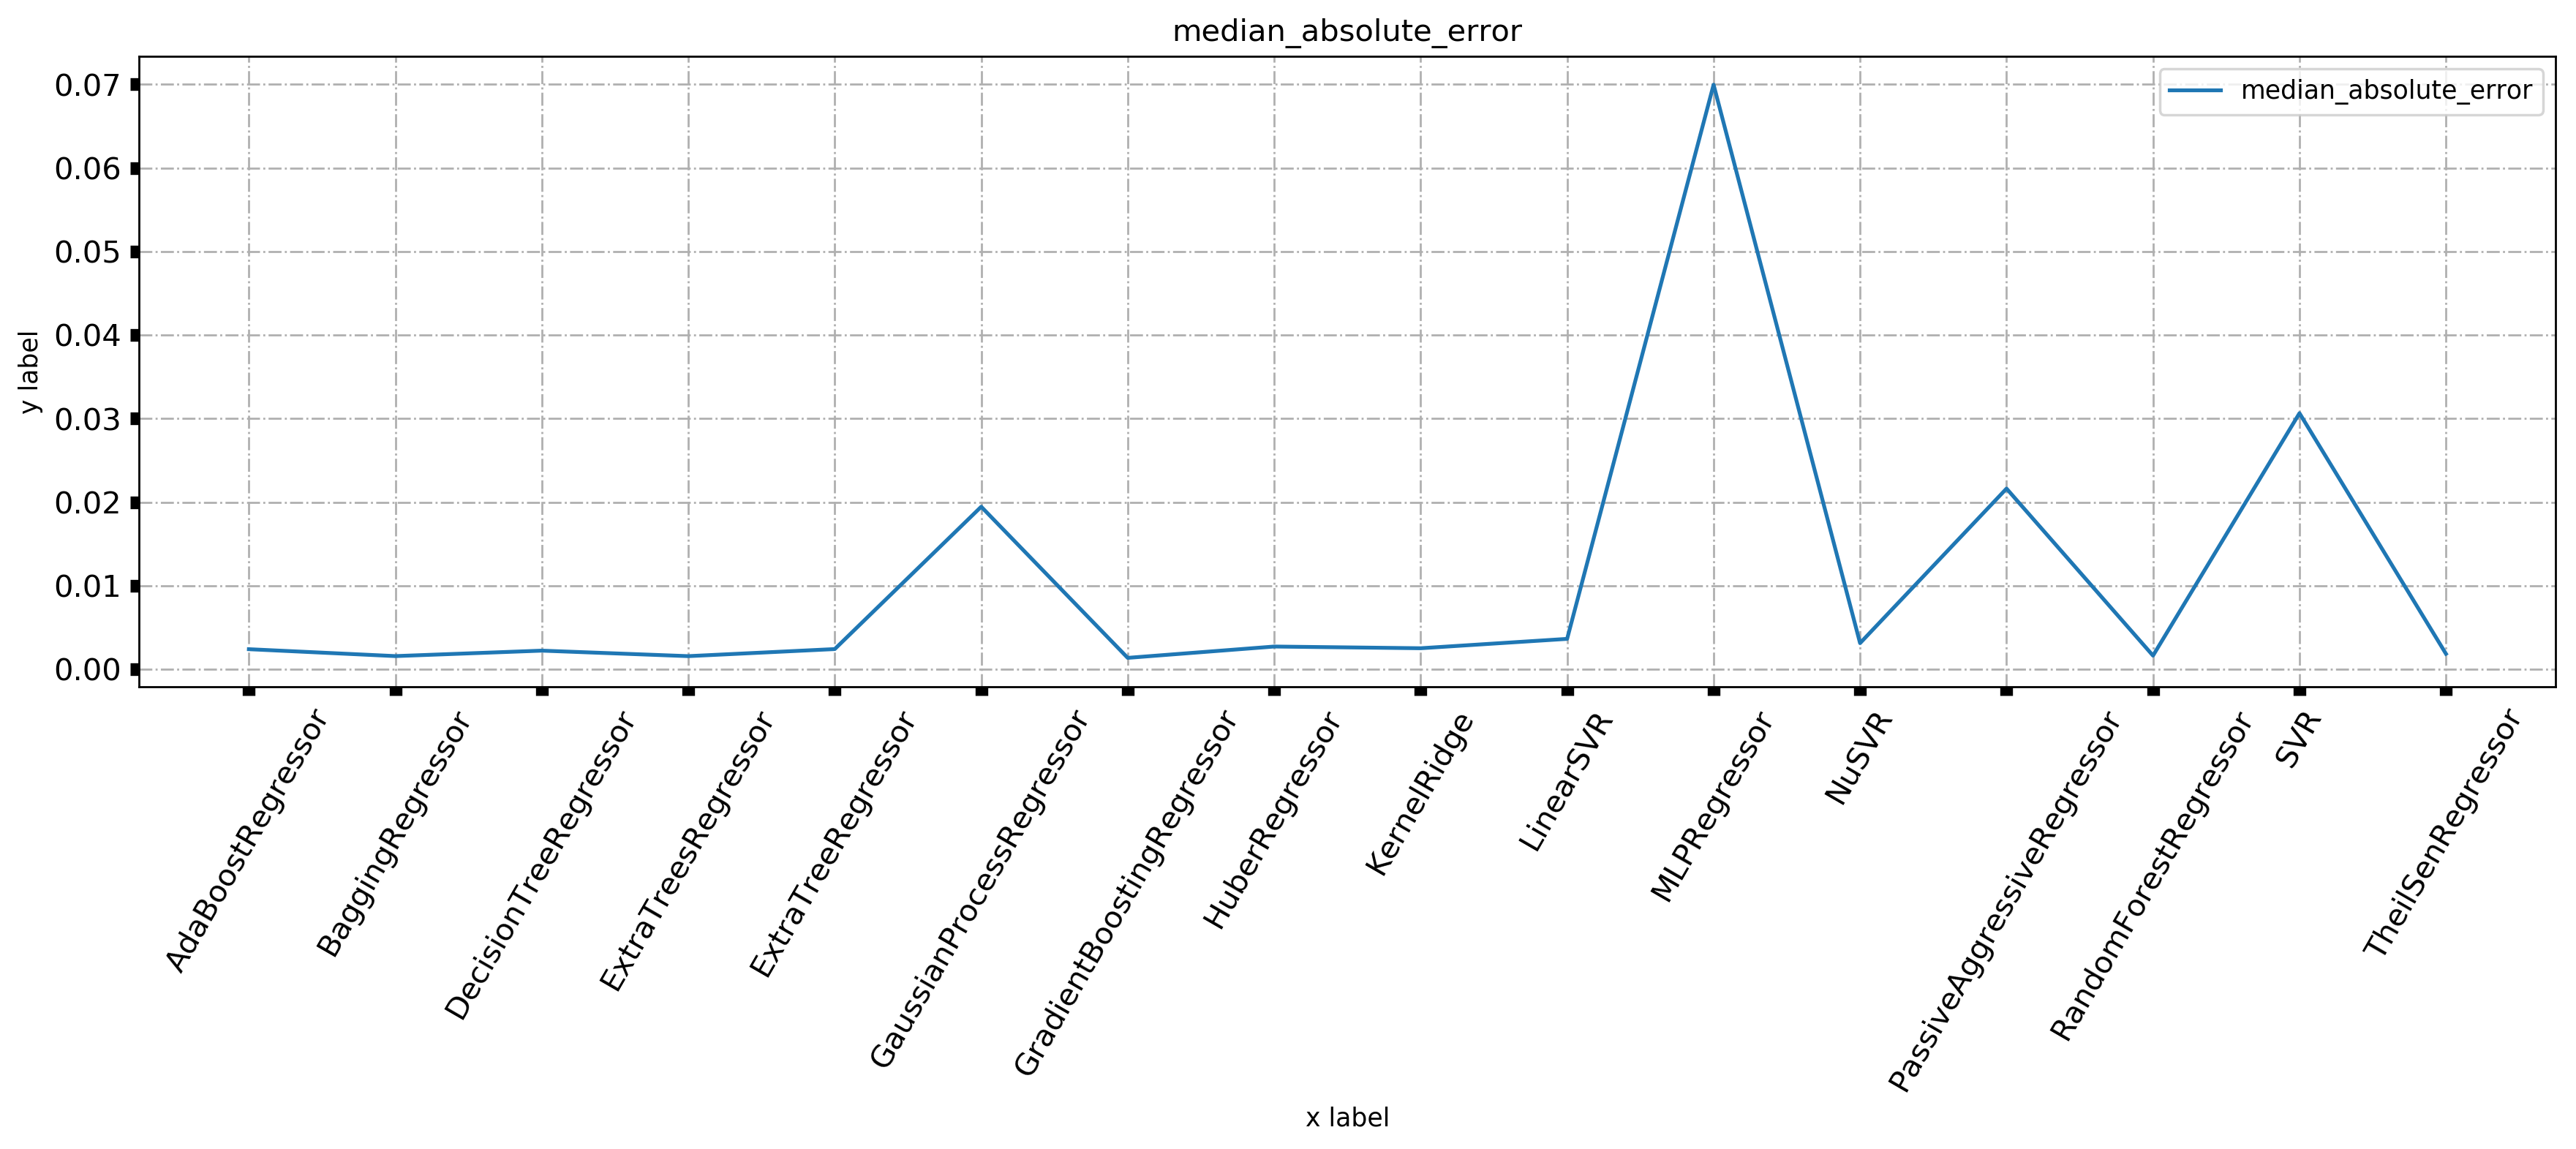

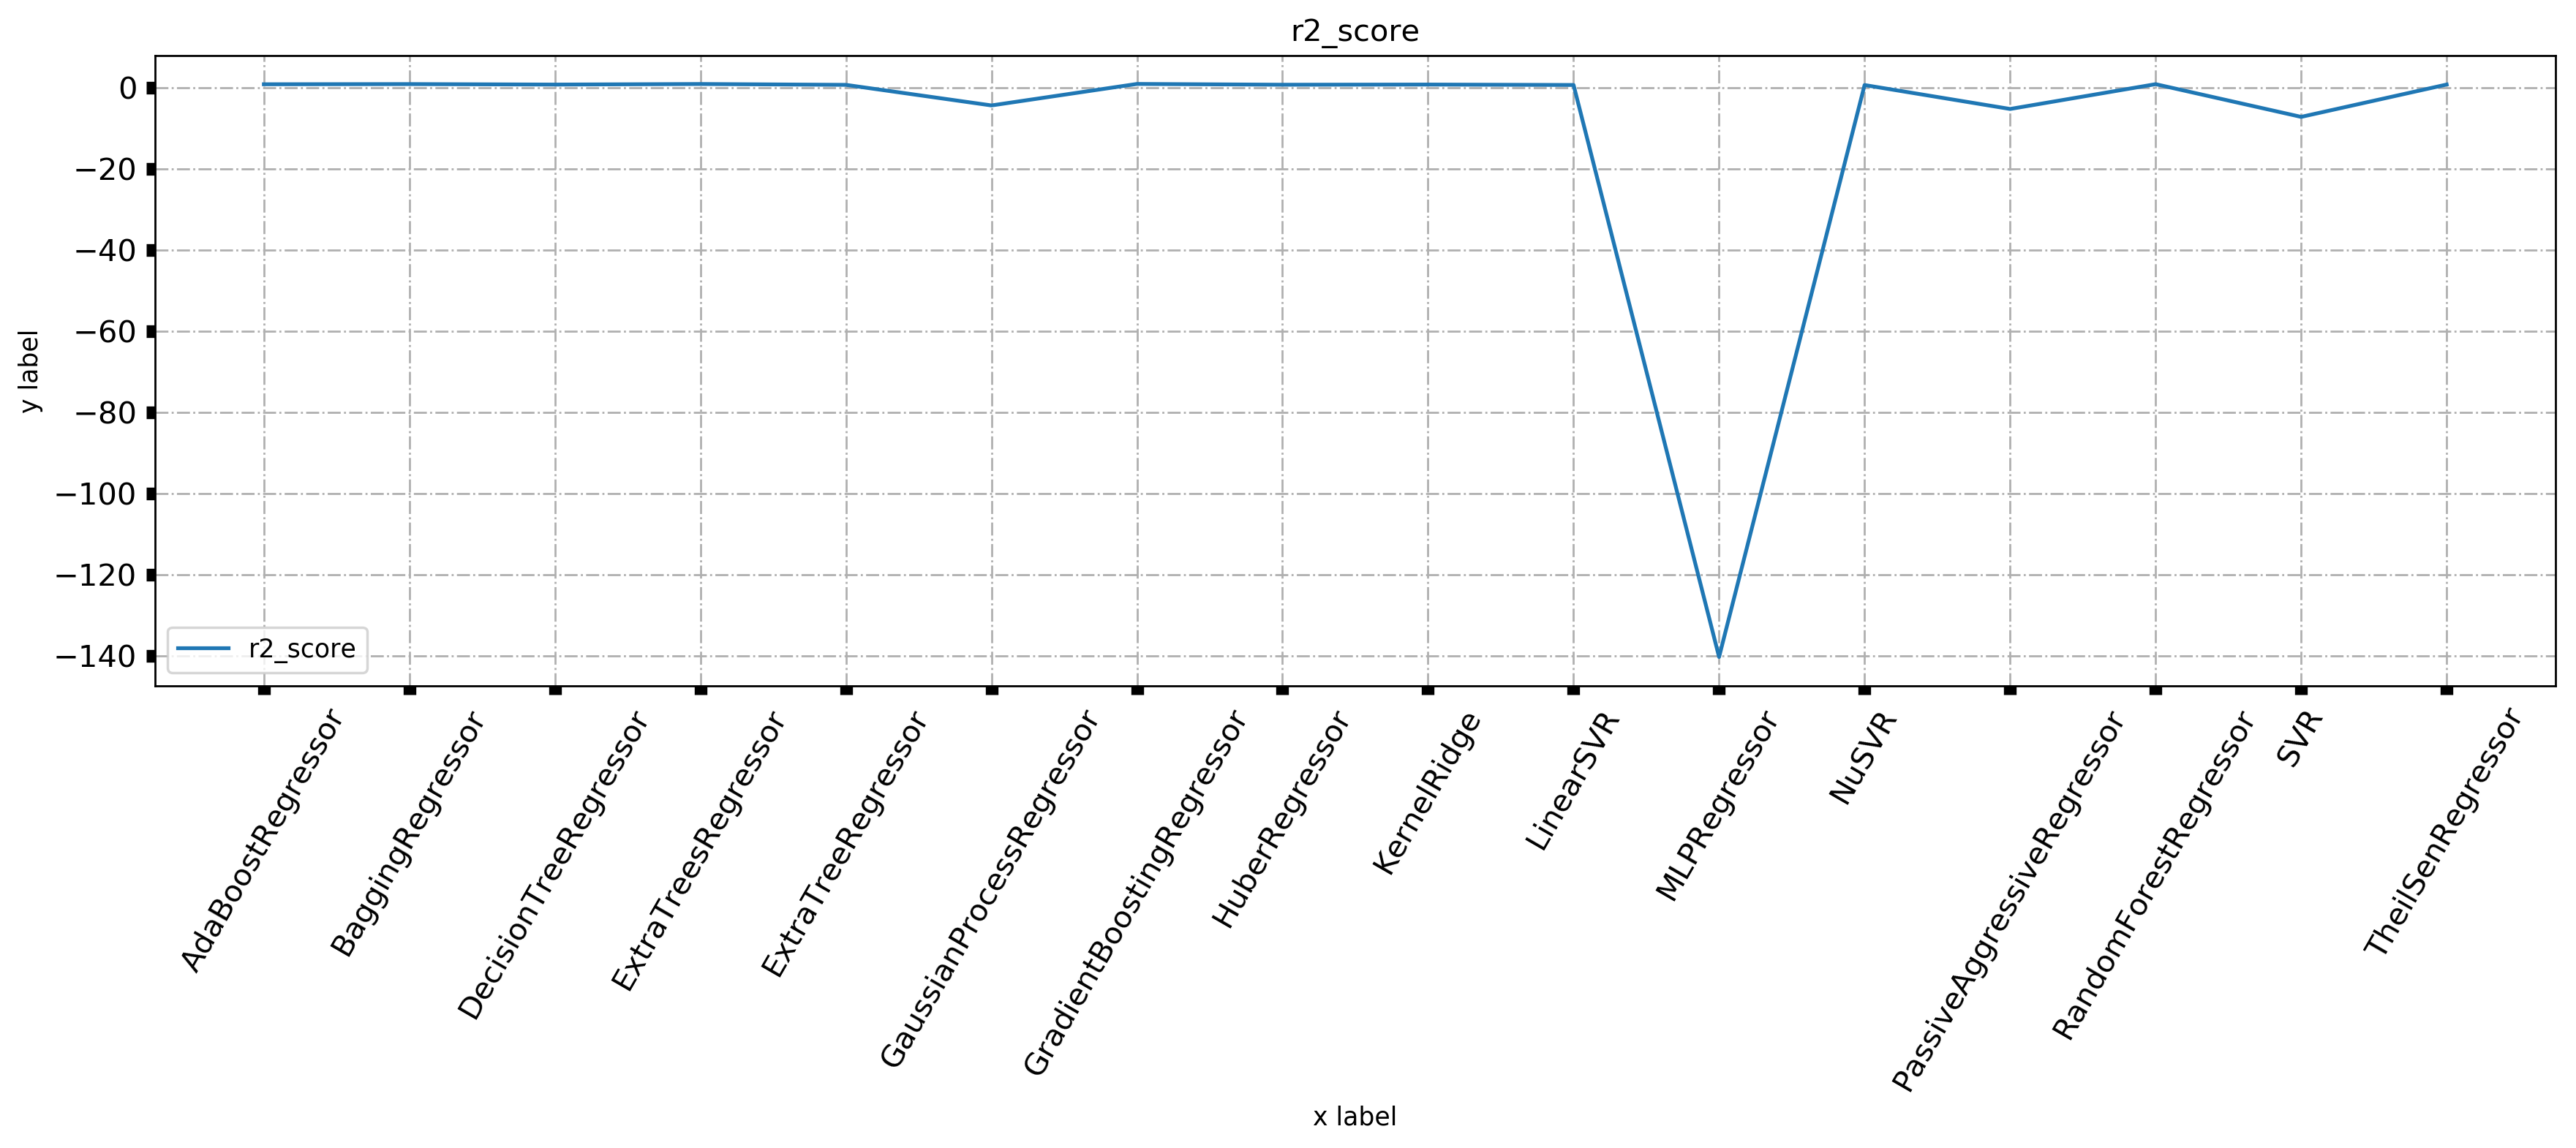

In [40]:
#Regression

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

if model_type=="classification":
    labels= ['accuracy', 'precision', 'recall', 'f1']
elif model_type=="regression":
    labels= ['explained_variance_score',  'mean_absolute_error', 'mean_squared_error', 'mean_squared_log_error', 'median_absolute_error', 'r2_score']

for n in range(0,6):
    figure(num=None, figsize=(14, 6), dpi=250)
    
    ax = plt.subplot(111)
    
    plt.plot(evaluation['Model Name'],evaluation[labels[n]], label = labels[n])

    leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
    plt.xticks(rotation=60)
    # leg.get_frame().set_alpha(0.5)
    plt.legend()
    ax.tick_params(labelsize='large', width=5)
    ax.grid(True, linestyle='-.')

    plt.tight_layout()
    plt.xlabel('x label')
    plt.ylabel('y label')

    plt.title(labels[n])
    plt.show()
